In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE



In [ ]:
df= pd.read_csv("../Data/processed.csv")
df.head()  # 0 means "NO", 1 Means "Yes"


<bound method DataFrame.value_counts of              0    1    2    3    4    5    6    7    8    9  Churn
0    -1.277445  0.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0      0
1     0.066327  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0      0
2    -1.236724  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0      1
3     0.514251  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0      0
4    -1.236724  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0      1
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...
7038 -0.340876  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0      0
7039  1.613701  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0
7040 -0.870241  0.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0      0
7041 -1.155283  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0      1
7042  1.369379  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0      0

[7043 rows x 11 columns]>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Churn", axis=1), df["Churn"] ,test_size=0.2, stratify=df["Churn"], random_state=42)
#stratify=y keeps the same proportion of churn vs. non-churn in train and test sets.

In [5]:
#imbalance handling using SMOTE 
smote = SMOTE(random_state=42)
X_train_re, y_train_re= smote.fit_resample(X_train, y_train)

In [6]:
y_train_re.value_counts()

Churn
0    4139
1    4139
Name: count, dtype: int64

In [7]:
lr = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
lr.fit(X_train_re, y_train_re)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [8]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], shape=(1409,))

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7388218594748048

Confusion Matrix:
 [[743 292]
 [ 76 298]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



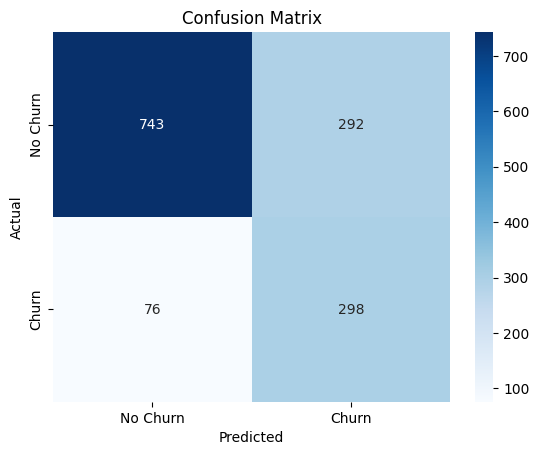

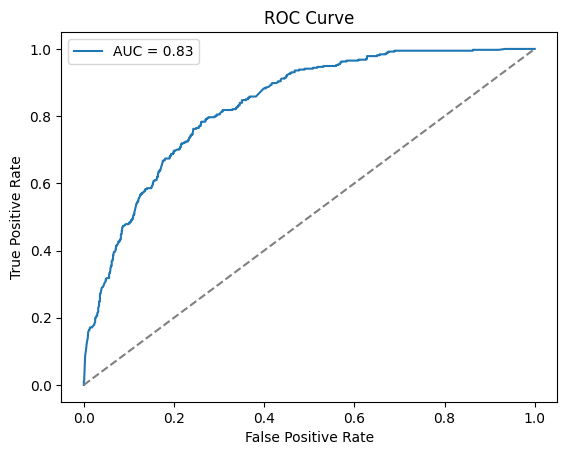

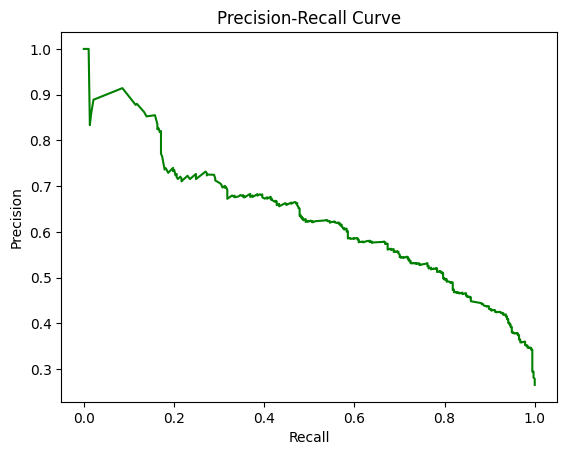

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


y_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


prec, rec, _ = precision_recall_curve(y_test, y_prob)
plt.plot(rec, prec, color="green")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
